In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import numpy as np

## Flipping a qubit.

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Goal: A qubit in the state $|\psi'\rangle = |\alpha |1\rangle + \beta |0\rangle$.

Solution: The $X$ gate flips a qubit from $|0\rangle$ to $|1\rangle$ and vice-versa.

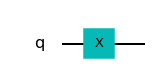

In [2]:
circ = QuantumCircuit(1)
circ.x(0)
circ.draw("mpl")

To see if this gate actually flips a qubit, we prepare a state $|\psi\rangle$ and then apply this gate to it.

In [3]:
rng = np.random.default_rng()

alpha, beta = rng.random((2,))
norm = np.sqrt(alpha**2 + beta**2)
alpha, beta = alpha / norm, beta / norm

psi = Statevector([alpha, beta])
psip = psi.evolve(circ)

print(f"|psi>: {psi.data}")
print(f"|psip>: {psip.data}")

|psi>: [0.13015784+0.j 0.99149329+0.j]
|psip>: [0.99149329+0.j 0.13015784+0.j]


## Basis change.

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Goal: If a qubit is in the state $|0\rangle$, change its state to $|+\rangle$. If it is in state $|1\rangle$, change its state to $|-\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors.

Solution: The Hadamard or $H$ gate does the job, $H|0\rangle = |+\rangle$, $H|1\rangle$. 

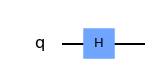

In [4]:
circ = QuantumCircuit(1)
circ.h(0)
circ.draw("mpl")

In [5]:
zero = Statevector([1, 0])
one = Statevector([0, 1])

plus = zero.evolve(circ)
minus = one.evolve(circ)
psih = psi.evolve(circ)

print(f"|+>: {plus.data}")
print(f"|->: {minus.data}")
print(f"|psih>: {psih.data}")

|+>: [0.70710678+0.j 0.70710678+0.j]
|->: [ 0.70710678+0.j -0.70710678+0.j]
|psih>: [ 0.79312712+0.j -0.60905613+0.j]


## Sign flip

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Output: A qubit in the state $|\psi'\rangle = \alpha |0\rangle - \beta |1\rangle$.

Solution: The $Z$ gate flips the sign of $|1\rangle$. It converts $|+\rangle$ to $|-\rangle$. The $Z$ gate acts in the same way in the $X$ basis as the $X$ gate in the $Z$ basis.

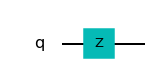

In [6]:
circ = QuantumCircuit(1)
circ.z(0)
circ.draw("mpl")

In [7]:
psi_sf = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_sf>: {psi_sf.data}")

|psi>: [0.13015784+0.j 0.99149329+0.j]
|psi_sf>: [ 0.13015784+0.j -0.99149329+0.j]


## Amplitude change

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, and an angle $\theta$ in radians.

Goal: If a qubit is in the state $|0\rangle$, change its state to $\cos\theta|0\rangle + \sin\theta|1\rangle$. If it is in state $|0\rangle$, change its state to $-\sin\theta|0\rangle + \cos\theta|1\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors. 

Solution: We have to use the $U_3(2\theta, 0, 0)$ gate. The matrix representation of this gate is $$\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}.$$

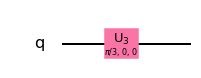

In [8]:
theta = np.pi / 6
circ = QuantumCircuit(1)
circ.u3(2*theta, 0, 0, 0)
circ.draw("mpl")

In [9]:
psi_ac = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_ac>: {psi_ac.data}")

|psi>: [0.13015784+0.j 0.99149329+0.j]
|psi_ac>: [-0.38302665+0.j  0.92373729+0.j]


## Phase flip

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

Goal: Change the qubit state to $|\psi'\rangle = \alpha|0\rangle + i\beta|1\rangle$.

Solution: We can use the $R_\phi$ gate for this, with $\phi = \pi/2$, whose matrix representation is $$\begin{bmatrix} = 1 & 0 \\ 0 & i \end{bmatrix}$$.

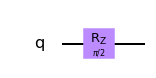

In [10]:
phi = np.pi / 2
circ = QuantumCircuit(1)
circ.rz(phi, 0)
circ.draw("mpl")

In [11]:
psi_pf = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_pf>: {psi_pf.data}")

|psi>: [0.13015784+0.j 0.99149329+0.j]
|psi_pf>: [0.09203549-0.09203549j 0.70109163+0.70109163j]


In [ ]:
## 